In [1]:
# Predition using DeepLearning (Classification)

import tensorflow as tf
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

diabetes_df = pd.DataFrame(X, columns=diabetes.feature_names)
diabetes_df['target'] = y
diabetes_df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
# Convert the target variable to binary (1 for diabetes, 0 for no diabetes)
y_binary = (y > np.median(y)).astype(int)

In [42]:
# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

diabetes_df = pd.DataFrame(X, columns=diabetes.feature_names)
diabetes_df['target'] = y_binary
diabetes_df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,1
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,1


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.40, random_state=42)
N, D = X_train.shape
print(N, D) # train and test row count


265 10


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(len(X_train))
print(len(X_test))
print("---------")
print(len(diabetes_df))

265
177
---------
442


In [67]:

# Example model

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model = tf.keras.models.Sequential([
    # tf.keras.layers.Input(shape=(D,)),
    # tf.keras.layers. Dense(64, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizerAlgo = tf.keras.optimizers.Adam(learning_rate=0.0001) #loss apprx:37%
# ptimizerAlgo = tf.keras.optimizers.SGD(learning_rate=0.001)    #loss apprx:58%
# ptimizerAlgo = tf.keras.optimizers.RMSprop(learning_rate=0.001)  #loss apprx: 43%
# ptimizerAlgo = tf.keras.optimizers.Adagrad(learning_rate=0.001)   #loss apprx: 62%
# optimizerAlgo = tf.keras.optimizers.Adafactor(learning_rate=0.001) #loss apprx: 44%
# optimizerAlgo = tf.keras.optimizers.Nadam(learning_rate=0.001)      #loss apprx: 35%
# optimizerAlgo = tf.keras.optimizers.Lamb(learning_rate=0.010) # loss 43%

model.compile(optimizer=optimizerAlgo, loss='binary_crossentropy', metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))


Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.5110 - loss: 0.9218 - val_accuracy: 0.4802 - val_loss: 0.8527
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5043 - loss: 0.8949 - val_accuracy: 0.4802 - val_loss: 0.8512
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5069 - loss: 0.8476 - val_accuracy: 0.4802 - val_loss: 0.8499
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5060 - loss: 0.8383 - val_accuracy: 0.4802 - val_loss: 0.8484
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5196 - loss: 0.8633 - val_accuracy: 0.4859 - val_loss: 0.8470
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4925 - loss: 0.8924 - val_accuracy: 0.4859 - val_loss: 0.8456
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5615 - loss: 0.7993 - val_accuracy: 0.4859 - val_loss: 0.8442
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5198 - loss: 0.8672 - val_accuracy: 0.4859 - val_loss

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7481 - loss: 0.4998 
[0.5108072757720947, 0.7320754528045654]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7680 - loss: 0.4594 
[0.44245028495788574, 0.790960431098938]
---------------------------------
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7680 - loss: 0.4594 


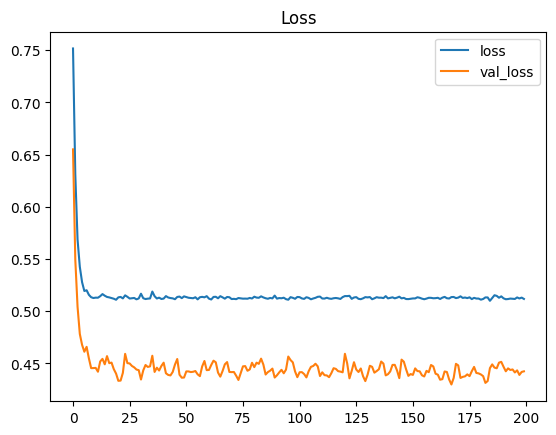

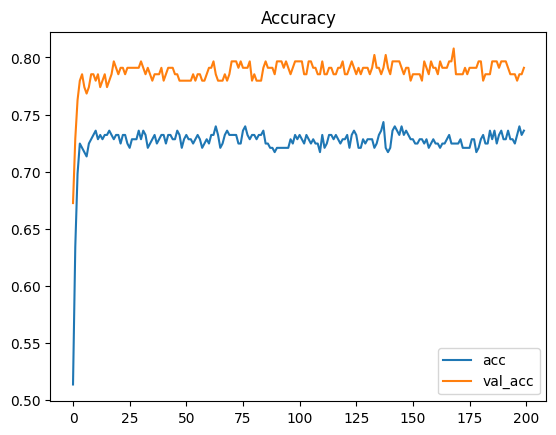

In [62]:
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))
print("---------------------------------")

model.evaluate(X_test, y_test)

plt.title('Loss')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.title('Accuracy')
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()



In [63]:
# Real prediction with the model created earlier

testData =  [
    [0.038076,	0.050680,	0.061696,	0.021872,	-0.044223,	-0.034821,	-0.043401,	-0.002592,	0.019907,	-0.017646], # 1
    [-0.089063,	-0.044642,	-0.011595,	-0.036656,	0.012191,	0.024991,	-0.036038,	0.034309,	0.022688,	-0.009362], # 1
    [0.005383,	-0.044642,	-0.036385,	0.021872,	0.003935,	0.015596,	0.008142,	-0.002592,	-0.031988,	-0.046641], # 0
    [-0.070900, -0.044642, 	0.039062, -0.033213, -0.012577,	-0.034508,-0.024993,-0.002592,0.067737,	-0.013504]      #	1
]

testData = scaler.transform(testData)

predictions = model.predict(testData)
print(predictions.astype(int))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
[[0]
 [0]
 [0]
 [0]]
